In [201]:
import pandas as pd
import re
import seaborn as sns
import numpy as np

# #0 Importando o(s) datasets

In [202]:
LeagueofLegends = pd.read_csv('Datasets/LeagueofLegends.csv')
dfKills = pd.read_csv('Datasets/kills.csv')
dfmatchinfo = pd.read_csv('Datasets/matchinfo.csv')


# #1 Limpeza e organização dos dados

In [203]:
# Primeiro verifico o tipo de dado que compõe a coluna, se ele está ideal para uso ou se deve ser alterado
print(type(LeagueofLegends['League'][0]))
# Como a coluna League trata-se da liga na qual o dado foi obtido, logo, uma string
print(type(LeagueofLegends['Year'][0]))
# A coluna ano é a coluna do ano no qual o dado foi obtido, logo, um numero inteiro
type(LeagueofLegends['Season'][0])
type(LeagueofLegends['Type'][0])
type(LeagueofLegends['blueTeamTag'][0])
type(LeagueofLegends['bResult'][0])
type(LeagueofLegends['rResult'][0])
type(LeagueofLegends['redTeamTag'][0])
type(LeagueofLegends['gamelength'][0]) #Em minutos
type(LeagueofLegends['golddiff'][0]) #Transformar em Lista
type(LeagueofLegends['goldblue'][0]) #Transformar em lista
type(LeagueofLegends['bTowers'][0]) #Transformar em lista (Time,Lane,Type)
type(LeagueofLegends['bInhibs'][0]) #Transformar em lista (Time, Type)
type(LeagueofLegends['bDragons'][0]) #Transformar em lista (Time, Type), encontrar forma de contar dragões
type(LeagueofLegends['bBarons'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['bHeralds'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['goldred'][0]) #Transformar em lista
type(LeagueofLegends['rTowers'][0]) #Transformar em lista (Time,Lane,Type)
type(LeagueofLegends['rInhibs'][0]) #Transformar em lista (Time, Type)
type(LeagueofLegends['rDragons'][0]) #Transformar em lista (Time, Type), encontrar forma de contar dragões
type(LeagueofLegends['rBarons'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['rHeralds'][0]) #Transformar em lista(qnt, Time)

type(LeagueofLegends['blueTopChamp'][0])
type(LeagueofLegends['goldblueTop'][0]) #Transsformar em lista
type(LeagueofLegends['blueJungleChamp'][0])
type(LeagueofLegends['goldblueJungle'][0]) #Transsformar em lista
type(LeagueofLegends['redMiddleChamp'][0])
type(LeagueofLegends['goldblueMiddle'][0]) #Transsformar em lista
type(LeagueofLegends['blueADCChamp'][0])
type(LeagueofLegends['goldblueADC'][0]) #Transsformar em lista
type(LeagueofLegends['blueSupportChamp'][0])
type(LeagueofLegends['goldblueSupport'][0]) #Transsformar em lista
type(LeagueofLegends['blueBans'][0]) #Transformar em lista
type(LeagueofLegends['blueTop'][0])
type(LeagueofLegends['blueJungle'][0])
type(LeagueofLegends['blueMiddle'][0])
type(LeagueofLegends['blueADC'][0])
type(LeagueofLegends['blueSupport'][0])

type(LeagueofLegends['redTopChamp'][0])
type(LeagueofLegends['goldredTop'][0]) #Transsformar em lista
type(LeagueofLegends['redJungleChamp'][0])
type(LeagueofLegends['goldredJungle'][0]) #Transsformar em lista
type(LeagueofLegends['redMiddleChamp'][0])
type(LeagueofLegends['goldredMiddle'][0]) #Transsformar em lista
type(LeagueofLegends['redADCChamp'][0])
type(LeagueofLegends['goldredADC'][0]) #Transsformar em lista
type(LeagueofLegends['redSupportChamp'][0])
type(LeagueofLegends['goldredSupport'][0]) #Transsformar em lista
type(LeagueofLegends['redBans'][0]) #Transformar em lista
type(LeagueofLegends['redTop'][0])
type(LeagueofLegends['redJungle'][0])
type(LeagueofLegends['redMiddle'][0])
type(LeagueofLegends['redADC'][0])
type(LeagueofLegends['redSupport'][0])


<class 'str'>
<class 'numpy.int64'>


str

In [204]:
#Função para tranasformação simples de str para lista
def transListSimple(data, tipo = int):
    temp = []
    if(type(data[0]) == str):
        for i in data:
            lista = []
            i = i.replace('[','').replace(']','').split(', ')
            for j in range(len(i)):
                if(type(tipo) == int):
                    lista.append(i[j].isnumeric())
                else:
                    lista.append(i[j])
            temp.append(lista)
        return temp
    else:
        return data

In [238]:
LeagueofLegends['golddiff'][0]

'[0, 0, -14, -65, -268, -431, -488, -789, -494, -625, -1044, -313, -760, -697, -790, -611, 240, 845, 797, 1422, 987, 169, 432, 491, 1205, 1527, 1647, 1847, 3750, 4719, 3561, 3367, 2886, 2906, 4411, 4473, 4639, 4762, 4686, 6057]'

## APAGAR CELULA DE BAIXO

In [205]:
def killDF(column):
    out = []
    for i in range(len(LeagueofLegends[f'{column}'])):   
        string = LeagueofLegends[f'{column}'][i][1:-1:]
        lista = string.split('], [')
        lista[0] = lista[0][1::] #primeiro elemento sem o '['
        lista[len(lista)-1] = lista[len(lista)-1][:-1:] #ultimo elemento sem o ']'

        # ------------------------------------------------------
        temp = []
        for j in lista:    
            if (j != ""):
                c = j.replace(re.search(r'(?<=\[).*(?=\])', j)[0], '') #retirando a lista da string
                d = c.split(', ')

                d[0] = float(d[0].replace('.',''))/10**len(re.search(r'(?<=\.).*', d[0])[0])
                d[1] = d[1].replace("'","")
                d[2] = d[2].replace("'","")
                d[3] = re.search(r'(?<=\[).*(?=\])', j)[0].split(',')
                if d[4] != "": d[4] = float(d[4])
                if d[5] != "": d[5] = float(d[5])
                
                if (len(d[3]) > 0):
                    for k in range(1,len(d[3])):
                        d[3][k] = d[3][k].replace("'","")
                    for k in range(len(d[3])):
                        d[3][k] = d[3][k].replace(" '","").replace("'","")

            else:
                d = ['NotKilled']
            temp.append(d)
        out.append(temp)

    return out

In [206]:
jogos = range(len(dfKills['Address'].unique()))
JogosLink = dfKills['Address'].unique()
df_jogos = pd.DataFrame(data =JogosLink, index=jogos).reset_index()
df_jogos['Address'] = df_jogos[0]
df_jogos['IdJogo'] = df_jogos['index']
df_jogos = df_jogos.drop(columns=['index',0])
df_jogos

,Address,IdJogo
0,http://matchhistory.na.leagueoflegends.com/en/...,0
1,http://matchhistory.na.leagueoflegends.com/en/...,1
2,http://matchhistory.na.leagueoflegends.com/en/...,2
3,http://matchhistory.na.leagueoflegends.com/en/...,3
4,http://matchhistory.na.leagueoflegends.com/en/...,4
...,...,...
7615,https://matchhistory.euw.leagueoflegends.com/e...,7615
7616,https://matchhistory.euw.leagueoflegends.com/e...,7616
7617,https://matchhistory.na.leagueoflegends.com/en...,7617
7618,https://matchhistory.na.leagueoflegends.com/en...,7618


In [207]:
dfKills = dfKills.merge(LeagueofLegends[['Address', 'bResult']])
dfKills['bResult'] = dfKills.bResult.map({1 : 'Win', 0 : 'Loser'})


In [208]:
dfKills

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,bResult
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,Win
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,Win
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,Win
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,Win
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,Win
...,...,...,...,...,...,...,...,...,...,...,...,...
191064,https://matchhistory.na.leagueoflegends.com/en...,rKills,35.086,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,6424,9256,Loser
191065,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.706,TTC Low,LGC Raid,LGC Ceres,LGC Sybol,LGC Decoy,NaN,1464,2974,Loser
191066,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.711,TTC Swathe,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,1014,4828,Loser
191067,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.113,TTC Tilting,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,693,2924,Loser


# Visualização dos dados

In [209]:
dfKills.loc[dfKills.x_pos == 'TooEarly'] = np.NaN
dfKills.x_pos = dfKills.x_pos.astype(float)
dfKills.loc[dfKills.y_pos == 'TooEarly'] = np.NaN
dfKills.y_pos = dfKills.y_pos.astype(float)

In [210]:
# sns.scatterplot(dfKills, x='x_pos', y='y_pos')
dfKills.y_pos = dfKills.y_pos.dropna()
dfKills.x_pos = dfKills.x_pos.dropna()

In [211]:
dfKills

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,bResult
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229.0,8469.0,Win
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908.0,5960.0,Win
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281.0,7889.0,Win
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522.0,8895.0,Win
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902.0,7643.0,Win
...,...,...,...,...,...,...,...,...,...,...,...,...
191064,https://matchhistory.na.leagueoflegends.com/en...,rKills,35.086,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,6424.0,9256.0,Loser
191065,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.706,TTC Low,LGC Raid,LGC Ceres,LGC Sybol,LGC Decoy,NaN,1464.0,2974.0,Loser
191066,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.711,TTC Swathe,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,1014.0,4828.0,Loser
191067,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.113,TTC Tilting,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,693.0,2924.0,Loser


In [212]:
assist_kill = (dfKills.filter(like='Assist_').notna().sum(axis=1)+1)/10
dfKills['qnt_assist'] = assist_kill

Text(0.5, 1.0, 'Kills')

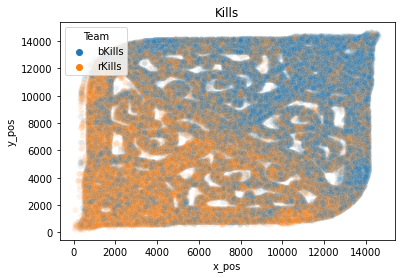

In [213]:
u = sns.scatterplot(data = dfKills, y='y_pos', x='x_pos', hue='Team', alpha=0.1)
u.set_title('Kills')

In [214]:
EarlyKill = dfKills.loc[dfKills.Time <= 15]
MidKill = dfKills.loc[(dfKills.Time > 15) & (dfKills.Time < 25)]
LateKill = dfKills.loc[dfKills.Time > 25]

Text(0.5, 1.0, 'Early Game')

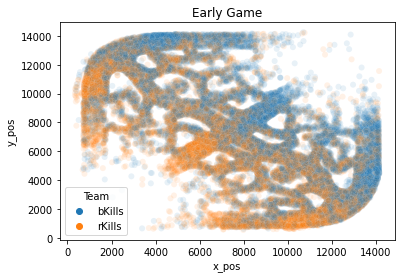

In [215]:
u = sns.scatterplot(data = EarlyKill, y='y_pos', x='x_pos', hue='Team', alpha=0.1, legend=True)
u.set_title('Early Game')

Text(0.5, 1.0, 'Mid Game')

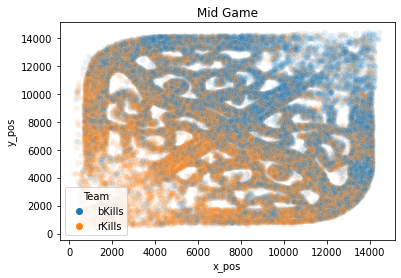

In [216]:
u = sns.scatterplot(data = MidKill, y='y_pos', x='x_pos', hue='Team', alpha=0.1)
u.set_title('Mid Game')

Text(0.5, 1.0, 'Late Game')

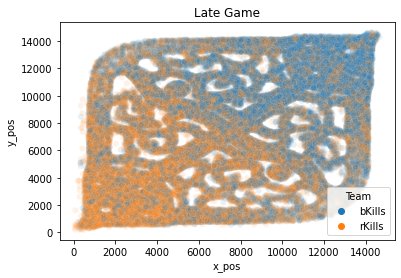

In [217]:
u = sns.scatterplot(data = LateKill, y='y_pos', x='x_pos', hue='Team', alpha=0.1)
u.set_title('Late Game')

### Por vitoria do time

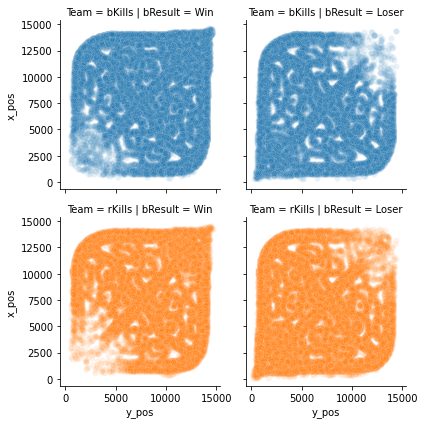

In [218]:
u = sns.FacetGrid(dfKills, col='bResult', row= "Team", hue="Team")
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.1)

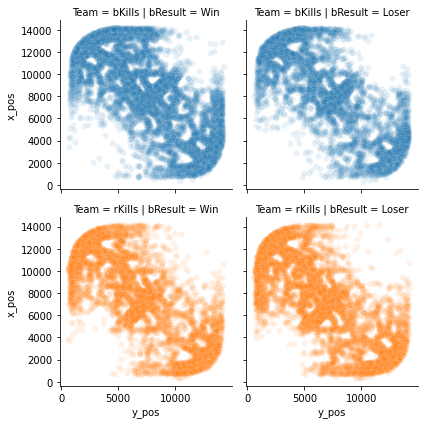

In [219]:
u = sns.FacetGrid(EarlyKill, col='bResult', row= "Team", hue="Team")
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.1)

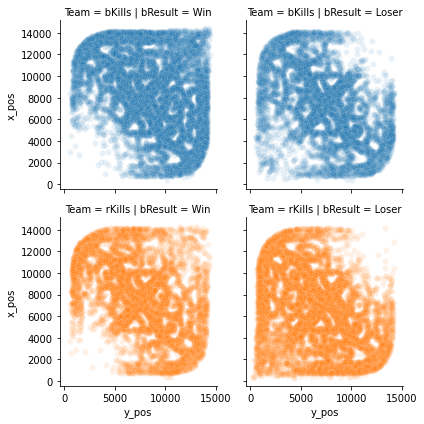

In [220]:
u = sns.FacetGrid(MidKill, col='bResult', row= "Team", hue="Team")
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.1)

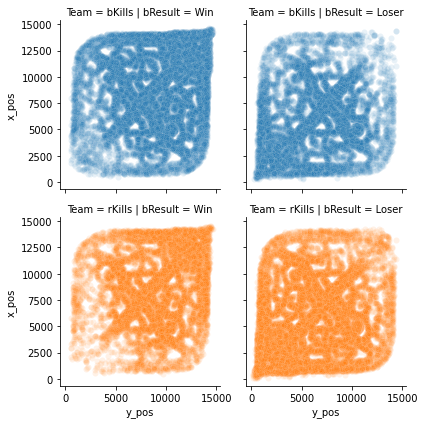

In [221]:
u = sns.FacetGrid(LateKill, col='bResult', row= "Team", hue="Team")
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.1)

### Analises de Ouro

In [222]:
dfGold = pd.read_csv('Datasets/gold.csv')
dfGold.merge(df_jogos)

,Address,Type,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,...,min_87,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95,IdJogo
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-14,-65,-268,-431,-488,-789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,http://matchhistory.na.leagueoflegends.com/en/...,goldblue,2415,2415,2711,3887,5068,6171,7412,8661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,http://matchhistory.na.leagueoflegends.com/en/...,goldred,2415,2415,2725,3952,5336,6602,7900,9450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,http://matchhistory.na.leagueoflegends.com/en/...,goldblueTop,475,475,532,687,893,1058,1172,1471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,http://matchhistory.na.leagueoflegends.com/en/...,goldblueJungle,475,475,532,870,1049,1276,1596,1815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99055,https://matchhistory.na.leagueoflegends.com/en...,goldredTop,500,500,581,1005,1225,1600,1774,2196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7619
99056,https://matchhistory.na.leagueoflegends.com/en...,goldredJungle,500,500,721,1015,1336,1614,1938,2230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7619
99057,https://matchhistory.na.leagueoflegends.com/en...,goldredMiddle,500,500,598,968,1165,1477,1801,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7619
99058,https://matchhistory.na.leagueoflegends.com/en...,goldredADC,500,500,587,954,1327,1749,2007,2471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7619


In [223]:
dfGold.Type.unique()

array(['golddiff', 'goldblue', 'goldred', 'goldblueTop', 'goldblueJungle',
       'goldblueMiddle', 'goldblueADC', 'goldblueSupport', 'goldredTop',
       'goldredJungle', 'goldredMiddle', 'goldredADC', 'goldredSupport'],
      dtype=object)

In [224]:
dfGold_golddiff = dfGold.loc[dfGold.Type == 'golddiff'] 
dfGold_Team = dfGold.loc[(dfGold.Type == 'goldblue') |( dfGold.Type == 'goldred')]
dfGold_BlueChamps = dfGold.loc[ ( dfGold.Type == 'goldblueTop') |
                                ( dfGold.Type == 'goldblueJungle') |
                                ( dfGold.Type == 'goldblueMiddle') |
                                ( dfGold.Type == 'goldblueADC') |
                                ( dfGold.Type == 'goldblueSupport') ]
dfGold_RedChamps = dfGold.loc[ ( dfGold.Type == 'goldredTop') |
                                ( dfGold.Type == 'goldredJungle') |
                                ( dfGold.Type == 'goldredMiddle') |
                                ( dfGold.Type == 'goldredADC') |
                                ( dfGold.Type == 'goldredSupport') ]

In [225]:
dfGold_golddiff = dfGold_golddiff.replace(to_replace=np.nan, value=0)
dfGold_golddiff = dfGold_golddiff.merge(LeagueofLegends[['Address', 'bResult', 'golddiff']])
dfGold_golddiff.bResult = dfGold_golddiff.bResult.map({1 : 'Win', 0 : 'Loser'})
dfGold_golddiff

,Address,Type,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,...,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95,bResult,golddiff
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-14,-65,-268,-431,-488,-789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win,"[0, 0, -14, -65, -268, -431, -488, -789, -494,..."
1,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-26,-18,147,237,-152,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,..."
2,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,10,-60,34,37,589,1064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ..."
3,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-15,25,228,-6,-243,175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ..."
4,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,40,40,44,-36,113,158,-121,-191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,https://matchhistory.euw.leagueoflegends.com/e...,golddiff,0,0,-18,-95,45,-87,-117,199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ..."
7616,https://matchhistory.euw.leagueoflegends.com/e...,golddiff,0,0,-86,-39,-207,-349,-60,-140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, 0, -86, -39, -207, -349, -60, -140, 187, -..."
7617,https://matchhistory.na.leagueoflegends.com/en...,golddiff,0,-8,-6,116,103,-92,-470,-958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loser,"[0, -8, -6, 116, 103, -92, -470, -958, -1998, ..."
7618,https://matchhistory.na.leagueoflegends.com/en...,golddiff,0,0,-97,33,351,284,299,263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win,"[0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ..."


In [280]:
amostraGold = dfGold_golddiff.sample(n=20, random_state=1)
amostraGoldBlue = amostraGold.loc[amostraGold.bResult == 'Win'].drop(columns = 'golddiff')
amostraGoldRed = amostraGold.loc[amostraGold.bResult == 'Loser'].drop(columns = 'golddiff')
TAmostraGoldBlue = amostraGoldBlue.T
TAmostraGoldRed = amostraGoldRed.T
TAmostraGoldBlue = TAmostraGoldBlue[2:97:1]
TAmostraGoldRed = TAmostraGoldRed[2:97:1]
idx = range(1,95)
TAmostraGoldBlue['minutos'] = range(1,96)
TAmostraGoldRed['minutos'] = range(1,96)
TAmostraGoldBlue = TAmostraGoldBlue.set_index('minutos')
TAmostraGoldRed = TAmostraGoldRed.set_index('minutos')


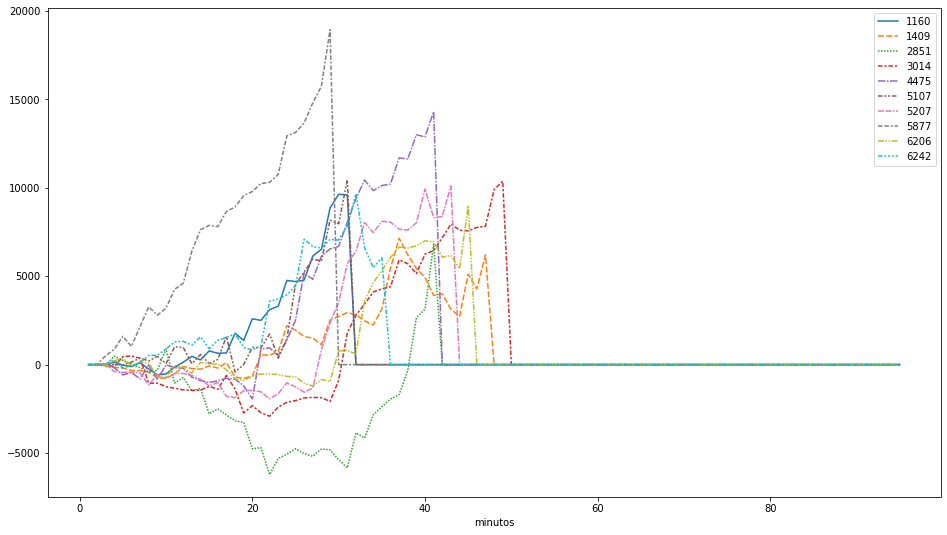

In [265]:
ax = sns.lineplot(data = TAmostraGoldBlue)
ax.figure.set_size_inches(16,9)

In [271]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [275]:
amostraGoldBlue

,Address,Type,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,...,min_87,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95,bResult
6242,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,10,44,244,-199,-44,111,524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
1160,http://matchhistory.euw.leagueoflegends.com/en...,golddiff,0,-20,-35,143,-32,-110,109,-251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
1409,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-91,-154,-196,-334,-336,-418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
5877,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,499,858,1603,1031,2157,3269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
2851,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-68,481,239,28,-179,-417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
4475,http://matchhistory.tr.leagueoflegends.com/tr/...,golddiff,0,0,14,-169,-582,-450,-809,-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
3014,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,-16,-9,-105,448,489,358,-1052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
5207,http://matchhistory.oce.leagueoflegends.com/en...,golddiff,0,0,53,-390,-433,-427,-471,-1142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
5107,http://matchhistory.oce.leagueoflegends.com/en...,golddiff,0,30,5,11,-16,142,370,208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win
6206,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,8,-47,222,336,-69,150,90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Win


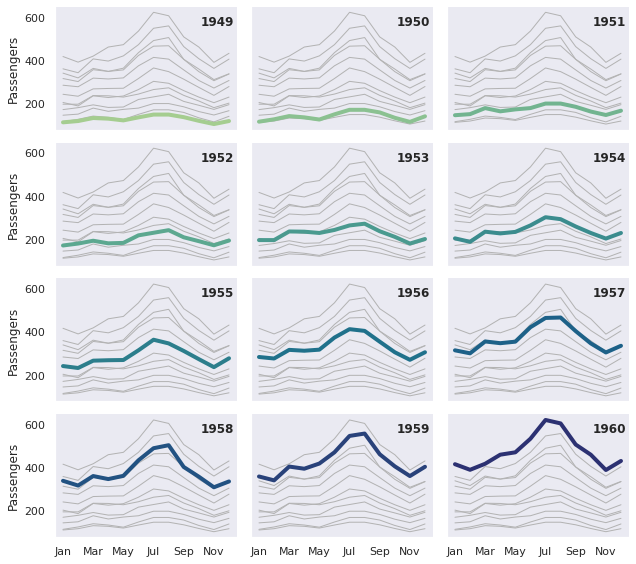

In [276]:
sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

In [279]:
TAmostraGoldBlue.astype


,6242,1160,1409,5877,2851,4475,3014,5207,5107,6206
minutos,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0
2,10,-20,0,0,0,0,-16,0,30,8
3,44,-35,-91,499,-68,14,-9,53,5,-47
4,244,143,-154,858,481,-169,-105,-390,11,222
5,-199,-32,-196,1603,239,-582,448,-433,-16,336
...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TypeError: Image data of dtype object cannot be converted to float

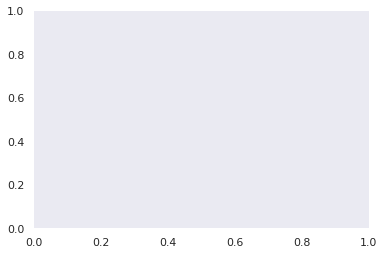

In [278]:
sns.heatmap(TAmostraGoldBlue)